In [1]:
import qiskit.tools.jupyter
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit import execute
import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.visualization import circuit_drawer

In [2]:
IBMQ.save_account('ID',overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
print(provider)
provider.backends()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [3]:
device1 = provider.get_backend('ibmq_qasm_simulator')
device1

<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
devicename='ibmq_qasm_simulator'
device = provider.get_backend(devicename)

6153e6b18bd4e2005c2da741


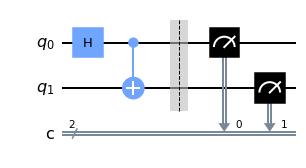

In [5]:
#%matplotlib inline
times=75
jobs = []
for i in range(1):
    qcs=[]
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()
    qc.measure([0, 1], [0, 1])
    qc.draw(output='mpl')
    for j in range(times):
        qcs.append(qc)
    job = execute(qcs, backend=device, shots=8192, optimization_level=0)
    print(job.job_id())
    jobs.append(job)

In [6]:
for i in range(1):
    print(jobs[i].job_id())
    print(jobs[i].status())

6153e6b18bd4e2005c2da741
JobStatus.DONE


In [7]:
result = [[0 for i in range(4)]for i in range(1)]
l = ['00','01','10','11']
for i in range(1):
    results = jobs[i].result()
    for j in range(len(results.results)):
        count=results.get_counts(j)
        for k in range(len(l)):
            if count.get(l[k])!=None:
                result[0][k]+=count.get(l[k])

[0.49870768 0.         0.         0.50129232]


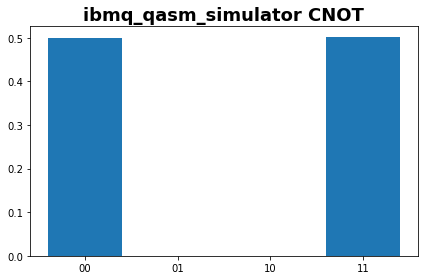

In [8]:
result=np.array(result)
print(result[0]/np.sum(result[0]))
plt.bar(['00','01','10','11'],result[0]/np.sum(result[0]))
plt.title(devicename+' CNOT',fontsize=18,fontweight ="bold")
plt.tight_layout()
plt.savefig(devicename+"_cnot_prob.png")
plt.show()

## Load Job

In [9]:
devicename='ibmq_qasm_simulator'
jobdevice = provider.get_backend(devicename)
jobs=[]
jobid = ['6153e6b18bd4e2005c2da741']
for i in range(1):
    jobs.append(jobdevice.retrieve_job(jobid[i]))
    print(jobs[i].job_id())
    print(jobs[i].status())

6153e6b18bd4e2005c2da741
JobStatus.DONE
